# Warmup Question 4

From *HealthCare Fraud Detection Capstone Project Proposal.ipynb*

**Summary:**

Claim-level EDA

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

## Get the data

In [4]:
beneficiary = pd.read_csv('data/archive/Train_Beneficiarydata-1542865627584.csv')
print(beneficiary.shape)
beneficiary.head(2)

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


In [5]:
inpatient = pd.read_csv('data/archive/Train_Inpatientdata-1542865627584.csv')
print(inpatient.shape)
inpatient.head(2) 

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [6]:
outpatient = pd.read_csv('data/archive/Train_Outpatientdata-1542865627584.csv')
print(outpatient.shape)
outpatient.head(2)

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [7]:
labels = pd.read_csv('data/archive/Train-1542865627584.csv')
print(labels.shape)
labels.head(2)

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


### Warmup Question 4:
- Study the distributions of **InscClaimAmtReimbursed**, **DeductibleAmtPaid** 
for both inpatient and outpatient services. Your team might want to work with hist, scatter or sns.pairplot, distplot, etc.
- Study the distributions of 
insurance covered percentages **InscClaimAmtReimbursed/(InscClaimAmtReimbursed+DeductibleAmtPaid)**.
- Study the distributions of the durations of average insurance claims (end-start) of the providers? 
Box-plot/violin-plot based on the **PotentialFraud** flag. Do you find any differences for none-potential fraud vs potential-fraud
providers?
- How are the service durations related to the total claim amounts, i.e. InscClaimAmtReimbursed+DeductibleAmtPaid?
- Consider mean daily total charges (i.e. total charge/duration), please describe their distribution.
How do the **Potential Fraud** flag affect the distribution patterns?


# Study the distributions of InscClaimAmtReimbursed, DeductibleAmtPaid for both inpatient and outpatient services.

Consider
- hist
- scatter or sns.pairplot
- distplot, etc.

In [10]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [11]:
outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


### Insurance reimbursement

In [13]:
inpatient['InscClaimAmtReimbursed'].describe()

count     40474.000000
mean      10087.884074
std       10303.099402
min           0.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [14]:
outpatient['InscClaimAmtReimbursed'].describe()

count    517737.000000
mean        286.334799
std         694.034343
min           0.000000
25%          40.000000
50%          80.000000
75%         200.000000
max      102500.000000
Name: InscClaimAmtReimbursed, dtype: float64

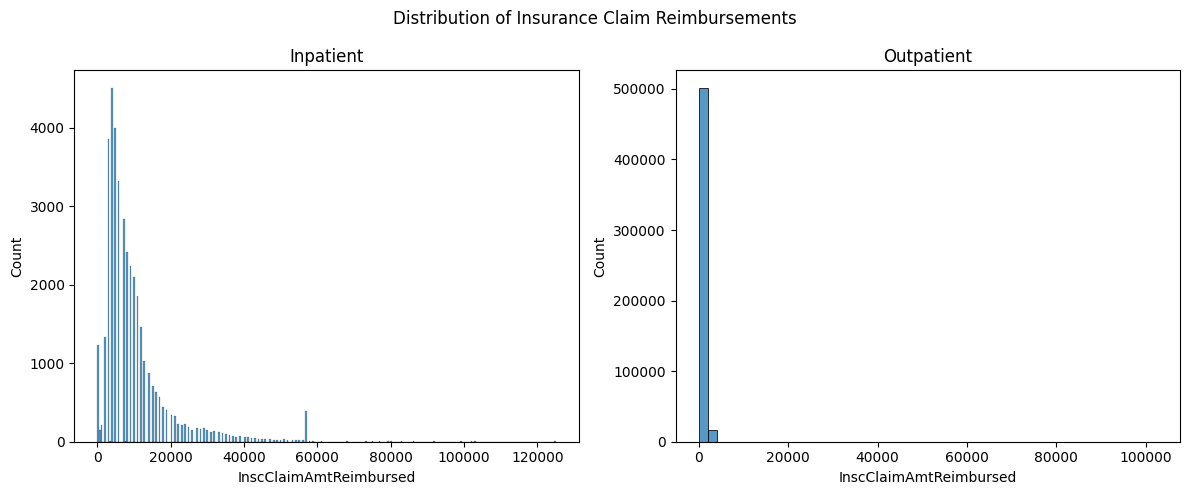

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(inpatient['InscClaimAmtReimbursed'], ax=axes[0])
axes[0].set_title('Inpatient')

sns.histplot(outpatient['InscClaimAmtReimbursed'], ax=axes[1], bins=50)
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Insurance Claim Reimbursements')
plt.tight_layout() 
plt.show()

Inpatient care is more expensive than outpatient care, as expected.

### Deductible paid

In [18]:
inpatient['DeductibleAmtPaid'].describe()

count    39575.0
mean      1068.0
std          0.0
min       1068.0
25%       1068.0
50%       1068.0
75%       1068.0
max       1068.0
Name: DeductibleAmtPaid, dtype: float64

In [19]:
outpatient['DeductibleAmtPaid'].describe()

count    517737.000000
mean          2.779233
std          15.785839
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         897.000000
Name: DeductibleAmtPaid, dtype: float64

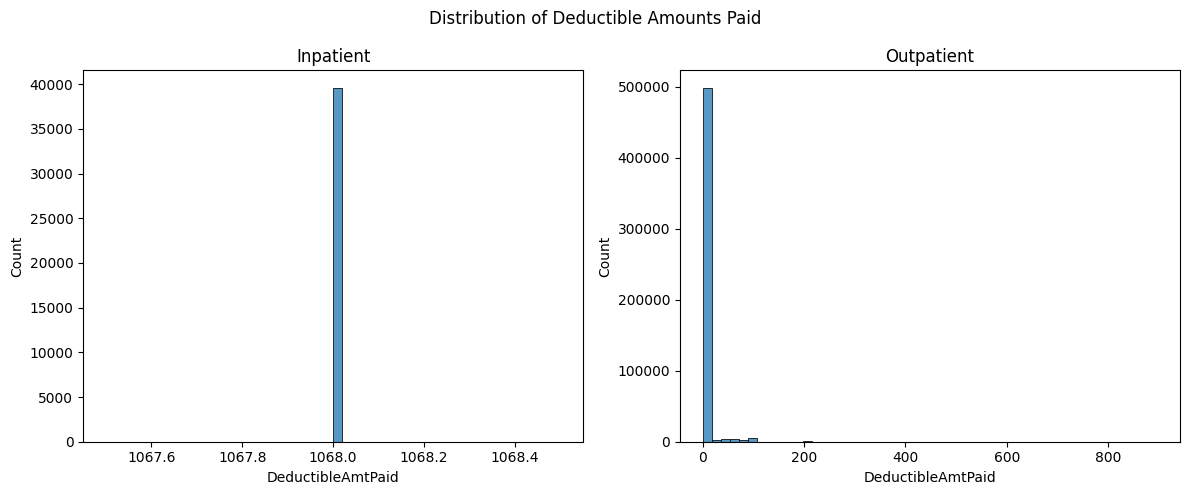

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(inpatient['DeductibleAmtPaid'], ax=axes[0], bins=50)
axes[0].set_title('Inpatient')

sns.histplot(outpatient['DeductibleAmtPaid'], ax=axes[1], bins=50)
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Deductible Amounts Paid')
plt.tight_layout() 
plt.show()

Inpatients have a fixed deductible of 1068 dollars.
Outpatients have a very low deductible, with 75% of outpatients paying 0 dollars. This could indicate insurance plans with no outpatient deductible or copay-based rather than deductible-based insurance plans? There are some outliers paying as much as 897 dollars.

**Note:** only 39,575 counts of inpatient 'DeductibleAmtPaid' out of 40,474 observations. Should eventually impute missing values with this fixed deductible amount of 1068.

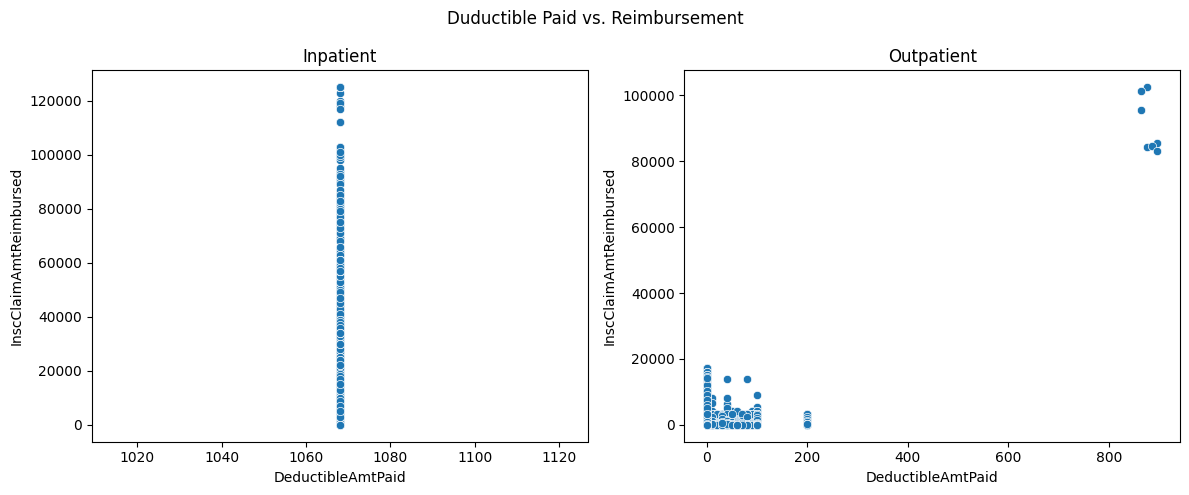

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='DeductibleAmtPaid', y='InscClaimAmtReimbursed', data=inpatient, ax=axes[0])
axes[0].set_title('Inpatient')

sns.scatterplot(x='DeductibleAmtPaid', y='InscClaimAmtReimbursed', data=outpatient, ax=axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Duductible Paid vs. Reimbursement')
plt.tight_layout() 
plt.show()

In [23]:
outpatient[['DeductibleAmtPaid', 'InscClaimAmtReimbursed']].corr()

,DeductibleAmtPaid,InscClaimAmtReimbursed
DeductibleAmtPaid,1.000000,0.092015
InscClaimAmtReimbursed,0.092015,1.000000


No notable correlation between reimbursement and deductible. 

Some noticeable bands in the deductible range data:
- 200, possibly some others in between that are harder to see. Maybe above 800 as well. Possibly due to insurance tiers?

### Another view

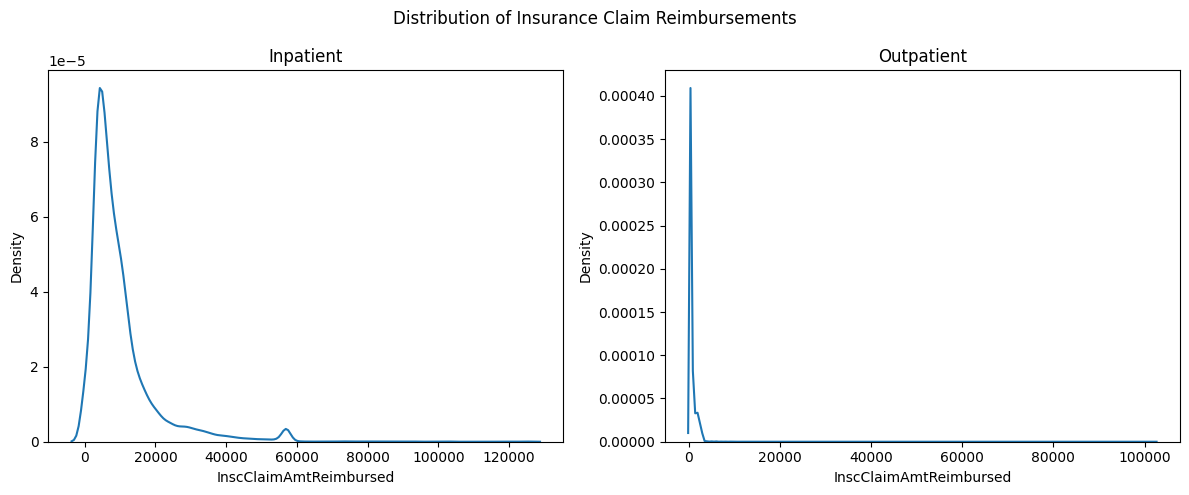

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(data=inpatient, x='InscClaimAmtReimbursed', ax=axes[0])
axes[0].set_title('Inpatient')

sns.kdeplot(data=outpatient, x='InscClaimAmtReimbursed', ax=axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Insurance Claim Reimbursements')
plt.tight_layout() 
plt.show()

# Study the distributions of insurance covered percentages 

InscClaimAmtReimbursed / (InscClaimAmtReimbursed+DeductibleAmtPaid)

In [28]:
inpatient['covered_percentage'] = inpatient['InscClaimAmtReimbursed'] / (inpatient['InscClaimAmtReimbursed'] + inpatient['DeductibleAmtPaid'])
outpatient['covered_percentage'] = outpatient['InscClaimAmtReimbursed'] / (outpatient['InscClaimAmtReimbursed'] + outpatient['DeductibleAmtPaid'])

In [29]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,covered_percentage
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.960544
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,0.823995


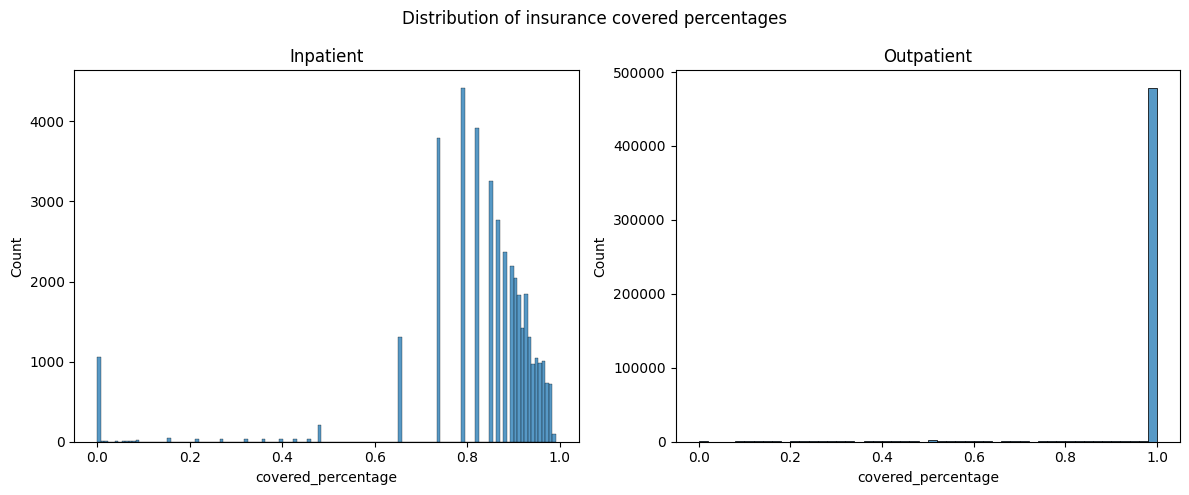

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(inpatient['covered_percentage'], ax=axes[0])
axes[0].set_title('Inpatient')

sns.histplot(outpatient['covered_percentage'], ax=axes[1], bins=50)
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of insurance covered percentages')
plt.tight_layout() 
plt.show()

In [31]:
inpatient['covered_percentage'].describe()

count    39575.000000
mean         0.829798
std          0.167507
min          0.000000
25%          0.789266
50%          0.867625
75%          0.918274
max          0.991528
Name: covered_percentage, dtype: float64

In [32]:
outpatient['covered_percentage'].describe()

count    499072.000000
mean          0.982011
std           0.101637
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: covered_percentage, dtype: float64

- Nearly all outpatient services are covered at 98%.
- The mean inpatient service is covered at 83%.
- Half of inpatients receive 80% to 92% coverage.
- There is a small percentage of inpatient services that look like they are not covered at all.   

# Study the distributions of the durations of average insurance claims (end-start) of the providers.

Look at box-plot/violin-plot based on the PotentialFraud flag. Do you find any differences for none-potential fraud vs potential-fraud providers?

look at average insurance claims for providers


In [35]:
# convert dates to datetime objects
inpatient['ClaimEndDt'] = pd.to_datetime(inpatient['ClaimEndDt'])
inpatient['ClaimStartDt'] = pd.to_datetime(inpatient['ClaimStartDt'])
outpatient['ClaimEndDt'] = pd.to_datetime(outpatient['ClaimEndDt'])
outpatient['ClaimStartDt'] = pd.to_datetime(outpatient['ClaimStartDt'])

In [36]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  object        
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  object

In [37]:
# create claim duration colummns
inpatient['claim_duration'] = (inpatient['ClaimEndDt'] - inpatient['ClaimStartDt']).dt.days
outpatient['claim_duration'] = (outpatient['ClaimEndDt'] - outpatient['ClaimStartDt']).dt.days

In [38]:
inpatient['claim_duration'].describe()

count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: claim_duration, dtype: float64

In [39]:
outpatient['claim_duration'].describe()

count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: claim_duration, dtype: float64

### add hospital duration to inpatient dataframe

In [41]:
# change admission and discharge dates to datetime objects
inpatient['AdmissionDt'] = pd.to_datetime(inpatient['AdmissionDt'])
inpatient['DischargeDt'] = pd.to_datetime(inpatient['DischargeDt'])

In [42]:
inpatient[['ClaimStartDt', 'AdmissionDt', 'ClaimEndDt', 'DischargeDt']]

,ClaimStartDt,AdmissionDt,ClaimEndDt,DischargeDt
0,2009-04-12,2009-04-12,2009-04-18,2009-04-18
1,2009-08-31,2009-08-31,2009-09-02,2009-09-02
2,2009-09-17,2009-09-17,2009-09-20,2009-09-20
3,2009-02-14,2009-02-14,2009-02-22,2009-02-22
4,2009-08-13,2009-08-13,2009-08-30,2009-08-30
...,...,...,...,...
40469,2009-09-28,2009-09-28,2009-10-02,2009-10-02
40470,2009-11-03,2009-11-03,2009-11-06,2009-11-06
40471,2009-11-18,2009-11-18,2009-11-22,2009-11-22
40472,2009-12-17,2009-12-17,2009-12-18,2009-12-18


for inpatient data, admission and discharge dates are the same as claim start and claim end dates, respectively. 
NO NEED FOR AN additional admission durations COLUMN

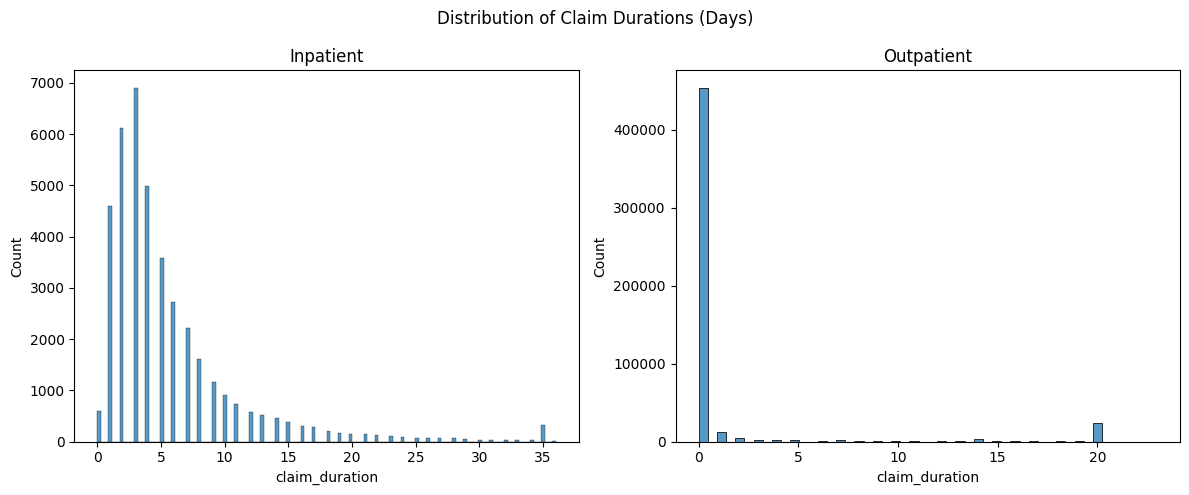

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(inpatient['claim_duration'], ax=axes[0])
axes[0].set_title('Inpatient')

sns.histplot(outpatient['claim_duration'], ax=axes[1], bins=50)
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Claim Durations (Days)')
plt.tight_layout() 
plt.show()

In [45]:
outpatient['ClaimStartDt'].value_counts()

ClaimStartDt
2009-03-03    1574
2009-03-21    1567
2009-01-31    1566
2009-04-25    1550
2009-02-16    1549
              ... 
2008-12-12      78
2008-12-15      75
2008-12-16      75
2008-12-13      67
2008-12-14      45
Name: count, Length: 385, dtype: int64

I am assuming that claim dates are not billing dates, but refer to the dates when services began and ended. 

**Inpatient claims**: these are dates of admission and discharge; i.e. the period for which a patient was hospitalized.
- the mean is 5.7 days, with half of hospitalizations being between 2 and 7 days.
- There is a spike at 35 days with quite a few claims. Is that oddly specific? To have so many claims that are exactly 35 days? Does that reflect some health care limit?
 
**Note:** Look into **post-acute care transitions** 

Around 30-35 days, there's often a transition point where patients are moved to skilled nursing facilities (SNFs) or long-term acute care hospitals (LTACHs) rather than remaining in acute inpatient care. (Claude)

**Fraud Analysis Implications**. Investigate:
- Are these claims all from the same provider(s)?
- Are the diagnoses consistent with 35-day stays?
- Is there evidence of premature discharges and readmissions to game the system?
- Are there "statistical bunching" patterns suggesting artificial duration manipulation?
   

**Outpatient claims**: dates medical service was administered. Generally same day, but could include a series of outpatient services like physical therapy sessions or recurring treatments.
- the mean is 1.4 days, with half of all outpatients having a 0 day duration, or probably getting same-day services.
- There is a spike at 20 days, which again seems oddly specific. But maybe this is a normal claim span for services like physical therapy and other recurring services? Almost 3 weeks of services. These are not business days but week days, btw. 

In [47]:
inpatient_durations = inpatient[['BeneID', 'covered_percentage', 'claim_duration', 'Provider', 'ClaimID']]
outpatient_durations = outpatient[['BeneID', 'covered_percentage', 'claim_duration', 'Provider', 'ClaimID']]

In [48]:
inpatient_durations.head()

,BeneID,covered_percentage,claim_duration,Provider,ClaimID
0,BENE11001,0.960544,6,PRV55912,CLM46614
1,BENE11001,0.823995,2,PRV55907,CLM66048
2,BENE11001,0.823995,3,PRV56046,CLM68358
3,BENE11011,0.823995,8,PRV52405,CLM38412
4,BENE11014,0.903506,17,PRV56614,CLM63689


In [49]:
inpatient_durations['Provider']

0        PRV55912
1        PRV55907
2        PRV56046
3        PRV52405
4        PRV56614
           ...   
40469    PRV53671
40470    PRV54981
40471    PRV56588
40472    PRV56575
40473    PRV54765
Name: Provider, Length: 40474, dtype: object

In [50]:
inpatient_durations.head(2)

,BeneID,covered_percentage,claim_duration,Provider,ClaimID
0,BENE11001,0.960544,6,PRV55912,CLM46614
1,BENE11001,0.823995,2,PRV55907,CLM66048


### add fraud flag to IP/OP durations

In [52]:
fraud_providers = labels[labels['PotentialFraud']=='Yes']['Provider'].to_list()

In [53]:
# add fraud status to the durations data
inpatient_durations.loc[:, 'fraud_suspected'] = ['Y' if x else 'N' for x in inpatient_durations['Provider'].isin(fraud_providers)]
outpatient_durations.loc[:, 'fraud_suspected'] = ['Y' if x else 'N' for x in outpatient_durations['Provider'].isin(fraud_providers)]

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_38388/2177894263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inpatient_durations.loc[:, 'fraud_suspected'] = ['Y' if x else 'N' for x in inpatient_durations['Provider'].isin(fraud_providers)]
/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_38388/2177894263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outpatient_durations.loc[:, 'fraud_suspected'] = ['Y' if x else 'N' for x in outpatient_durations['Provider'].isin(fraud_prov

In [54]:
inpatient_durations.head(2)

,BeneID,covered_percentage,claim_duration,Provider,ClaimID,fraud_suspected
0,BENE11001,0.960544,6,PRV55912,CLM46614,Y
1,BENE11001,0.823995,2,PRV55907,CLM66048,N


### Look at box-plot/violin-plot based on the fraud_suspected flag. Do you find any differences for none-potential fraud vs potential-fraud providers?

Look at service durations...

In [56]:
# get IP/OP stats for suspected fraud claims
inpatient_fraud = inpatient_durations[inpatient_durations['fraud_suspected']=='Y']
outpatient_fraud = outpatient_durations[outpatient_durations['fraud_suspected']=='Y']

In [57]:
print('INPATIENT fraud:')
print(inpatient_fraud.describe())
print('OUTPATIENT fraud:')
print(outpatient_fraud.describe())

INPATIENT fraud:
       covered_percentage  claim_duration
count        22894.000000    23402.000000
mean             0.831787        5.737886
std              0.166120        5.836285
min              0.000000        0.000000
25%              0.789266        2.000000
50%              0.867625        4.000000
75%              0.918274        7.000000
max              0.991528       36.000000
OUTPATIENT fraud:
       covered_percentage  claim_duration
count       182651.000000   189394.000000
mean             0.982266        1.433551
std              0.100983        4.728177
min              0.000000        0.000000
25%              1.000000        0.000000
50%              1.000000        0.000000
75%              1.000000        0.000000
max              1.000000       23.000000


In [58]:
# get IP/OP stats for non-fraud claims
inpatient_no_fraud = inpatient_durations[inpatient_durations['fraud_suspected']=='N']
outpatient_no_fraud = outpatient_durations[outpatient_durations['fraud_suspected']=='N']

In [59]:
print('INPATIENT no fraud:')
print(inpatient_no_fraud.describe())
print('OUTPATIENT no fraud:')
print(outpatient_no_fraud.describe())

INPATIENT no fraud:
       covered_percentage  claim_duration
count        16681.000000    17072.000000
mean             0.827069        5.553831
std              0.169360        5.329792
min              0.000000        0.000000
25%              0.789266        2.000000
50%              0.867625        4.000000
75%              0.911501        7.000000
max              0.991528       35.000000
OUTPATIENT no fraud:
       covered_percentage  claim_duration
count       316421.000000   328343.000000
mean             0.981864        1.413022
std              0.102013        4.695344
min              0.000000        0.000000
25%              1.000000        0.000000
50%              1.000000        0.000000
75%              1.000000        0.000000
max              1.000000       21.000000


In [60]:
print('INPATIENT fraud:')
print(inpatient_fraud.describe())
print('OUTPATIENT fraud:')
print(outpatient_fraud.describe())

INPATIENT fraud:
       covered_percentage  claim_duration
count        22894.000000    23402.000000
mean             0.831787        5.737886
std              0.166120        5.836285
min              0.000000        0.000000
25%              0.789266        2.000000
50%              0.867625        4.000000
75%              0.918274        7.000000
max              0.991528       36.000000
OUTPATIENT fraud:
       covered_percentage  claim_duration
count       182651.000000   189394.000000
mean             0.982266        1.433551
std              0.100983        4.728177
min              0.000000        0.000000
25%              1.000000        0.000000
50%              1.000000        0.000000
75%              1.000000        0.000000
max              1.000000       23.000000


In [61]:
inpatient_durations.head(2)

,BeneID,covered_percentage,claim_duration,Provider,ClaimID,fraud_suspected
0,BENE11001,0.960544,6,PRV55912,CLM46614,Y
1,BENE11001,0.823995,2,PRV55907,CLM66048,N


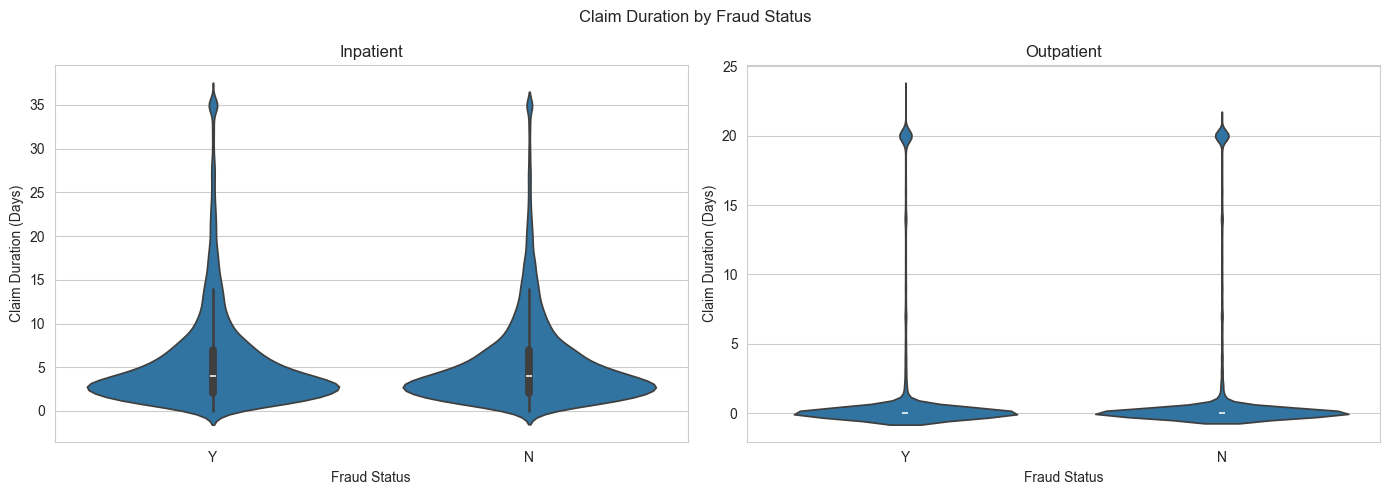

In [62]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
sns.violinplot(data=inpatient_durations, x='fraud_suspected', y='claim_duration', ax=axes[0])
axes[0].set_title('Inpatient')
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Claim Duration (Days)')
 
sns.violinplot(data=outpatient_durations, x='fraud_suspected', y='claim_duration', ax=axes[1])
axes[1].set_title('Outpatient')
axes[1].set_xlabel('Fraud Status')
axes[1].set_ylabel('Claim Duration (Days)')

plt.suptitle('Claim Duration by Fraud Status')
plt.tight_layout()
plt.show();

Comparing inpatient fraud/no-fraud and outpatient fraud/no-fraud - they are not that different.

**This is at the claim level** 

In [64]:
# # add patient type to durations dataframes in order to make one overall patient dataframe
# inpatient_durations.loc[:, 'patient_claim_type'] = 'Inpatient'
# outpatient_durations.loc[:, 'patient_claim_type'] = 'Outpatient'

### What is the average insurance claim per provider? 

group by provider and find the average claim duration. 

**This is at the provider level.**

Create columns with: 
- counts of number of inpatient claims associated with each provider
- aggregated claim durations for each provider
- average claim duration = aggregated claim duration / per number of claims for inpatient providers

In [66]:
inpatient_durations[inpatient_durations['Provider']=='PRV57719']

,BeneID,covered_percentage,claim_duration,Provider,ClaimID,fraud_suspected
3240,BENE22699,0.823995,1,PRV57719,CLM55019,N
25747,BENE105379,0.867625,5,PRV57719,CLM65778,N
36362,BENE144405,0.867625,14,PRV57719,CLM36621,N
36668,BENE145515,0.981608,35,PRV57719,CLM61781,N


In [67]:
# get patient claim counts per provider
ip_claim_counts = inpatient_durations.groupby('Provider')['BeneID'].count().reset_index()
op_claim_counts = outpatient_durations.groupby('Provider')['BeneID'].count().reset_index()
ip_claim_counts

,Provider,BeneID
0,PRV51001,5
1,PRV51003,62
2,PRV51007,3
3,PRV51008,2
4,PRV51011,1
...,...,...
2087,PRV57719,4
2088,PRV57728,1
2089,PRV57729,11
2090,PRV57732,11


In [68]:
ip_claim_counts.rename({'BeneID':'num_patient_claims'}, axis='columns', inplace=True)
op_claim_counts.rename({'BeneID':'num_patient_claims'}, axis='columns', inplace=True)
op_claim_counts

,Provider,num_patient_claims
0,PRV51001,20
1,PRV51003,70
2,PRV51004,149
3,PRV51005,1165
4,PRV51007,69
...,...,...
5007,PRV57759,28
5008,PRV57760,22
5009,PRV57761,82
5010,PRV57762,1


In [69]:
# get aggregate claim durations associated with each provider
total_claim_durations_ip = inpatient_durations.groupby('Provider')['claim_duration'].sum().reset_index()
total_claim_durations_ip.rename({'claim_duration':'total_admission_durations'}, axis='columns', inplace=True)
total_claim_durations_op = outpatient_durations.groupby('Provider')['claim_duration'].sum().reset_index()
total_claim_durations_op.rename({'claim_duration':'total_admission_durations'}, axis='columns', inplace=True)
total_claim_durations_ip

,Provider,total_admission_durations
0,PRV51001,25
1,PRV51003,320
2,PRV51007,16
3,PRV51008,8
4,PRV51011,5
...,...,...
2087,PRV57719,55
2088,PRV57728,4
2089,PRV57729,61
2090,PRV57732,58


In [70]:
inpatient_durations[inpatient_durations['Provider']=='PRV51007']

,BeneID,covered_percentage,claim_duration,Provider,ClaimID,fraud_suspected
1522,BENE16277,0.848896,4,PRV51007,CLM53111,N
23828,BENE98446,0.903506,5,PRV51007,CLM64487,N
24132,BENE99552,0.737463,7,PRV51007,CLM42710,N


In [71]:
# get average claim durations
ip_avg_durations = ip_claim_counts.merge(total_claim_durations_ip, on='Provider', how='outer')
op_avg_durations = op_claim_counts.merge(total_claim_durations_op, on='Provider', how='outer')
ip_avg_durations

,Provider,num_patient_claims,total_admission_durations
0,PRV51001,5,25
1,PRV51003,62,320
2,PRV51007,3,16
3,PRV51008,2,8
4,PRV51011,1,5
...,...,...,...
2087,PRV57719,4,55
2088,PRV57728,1,4
2089,PRV57729,11,61
2090,PRV57732,11,58


In [72]:
# create an average column.....
ip_avg_durations['avg_claim_duration'] = round((
    ip_avg_durations['total_admission_durations'] / ip_avg_durations['num_patient_claims']
), 2)

op_avg_durations['avg_claim_duration'] = round((
    op_avg_durations['total_admission_durations'] / op_avg_durations['num_patient_claims']
), 2)

ip_avg_durations.head(20)

,Provider,num_patient_claims,total_admission_durations,avg_claim_duration
0,PRV51001,5,25,5.00
1,PRV51003,62,320,5.16
2,PRV51007,3,16,5.33
3,PRV51008,2,8,4.00
4,PRV51011,1,5,5.00
5,PRV51021,29,139,4.79
6,PRV51023,9,32,3.56
7,PRV51024,9,39,4.33
8,PRV51025,13,91,7.00
9,PRV51030,82,379,4.62


In [73]:
# add fraud flags
ip_avg_durations.loc[:, 'fraud_suspected'] = [
    'Y' if x else 'N' for x in ip_avg_durations['Provider'].isin(fraud_providers)
]

op_avg_durations.loc[:, 'fraud_suspected'] = [
    'Y' if x else 'N' for x in op_avg_durations['Provider'].isin(fraud_providers)
]

In [74]:
ip_avg_durations.head()

,Provider,num_patient_claims,total_admission_durations,avg_claim_duration,fraud_suspected
0,PRV51001,5,25,5.00,N
1,PRV51003,62,320,5.16,Y
2,PRV51007,3,16,5.33,N
3,PRV51008,2,8,4.00,N
4,PRV51011,1,5,5.00,N


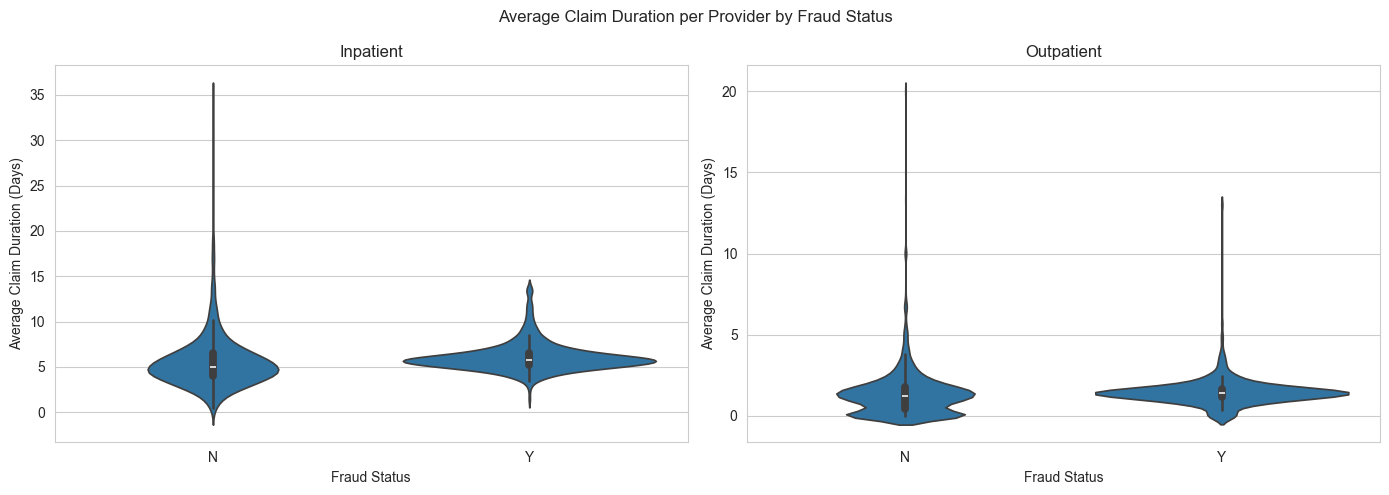

In [75]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
sns.violinplot(data=ip_avg_durations, x='fraud_suspected', y='avg_claim_duration', ax=axes[0])
axes[0].set_title('Inpatient')
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Average Claim Duration (Days)')
 
sns.violinplot(data=op_avg_durations, x='fraud_suspected', y='avg_claim_duration', ax=axes[1])
axes[1].set_title('Outpatient')
axes[1].set_xlabel('Fraud Status')
axes[1].set_ylabel('Average Claim Duration (Days)')

plt.suptitle('Average Claim Duration per Provider by Fraud Status')
plt.tight_layout()
plt.show();

Outpatients have shorter claim durations than inpatients, fraud or no fraud.


- **Inpatient fraud providers** have slightly longer claim durations than their non-fraud counterparts; so on average inpatient fraud providers are associated with patients who stay in the hospital a little longer. 
- There are more extreme cases of lengthy hospital stays for the non-fraud group. **So perhaps the fraud is not occurring via lengthy hospital stays.**

- **Outpatient non fraud providers** are associated with two distinct modes for claim durations
    - one mode around 0 days - same day services (likely)
    - one mode around 2 or so days     
- **Outpatient fraud providers** have this 2 or so day claim duration in common with their non-fraud counterpart with very few same day claims.
- There are more extremes in the non-fraud outpatient claim durations, with fewer extremes in the inpatient fraud group.

In [77]:
inpatient_durations

,BeneID,covered_percentage,claim_duration,Provider,ClaimID,fraud_suspected
0,BENE11001,0.960544,6,PRV55912,CLM46614,Y
1,BENE11001,0.823995,2,PRV55907,CLM66048,N
2,BENE11001,0.823995,3,PRV56046,CLM68358,N
3,BENE11011,0.823995,8,PRV52405,CLM38412,N
4,BENE11014,0.903506,17,PRV56614,CLM63689,N
...,...,...,...,...,...,...
40469,BENE159167,0.867625,4,PRV53671,CLM69886,Y
40470,BENE159175,0.789266,3,PRV54981,CLM74504,N
40471,BENE159177,0.737463,4,PRV56588,CLM76485,Y
40472,BENE159177,0.823995,1,PRV56575,CLM79949,Y


# How are the service durations related to the total claim amounts, i.e. InscClaimAmtReimbursed+DeductibleAmtPaid?


In [79]:
# create total claim amounts (per beneficiary, not claim) columns
inpatient_durations.loc[:, 'total_claim_amount'] = inpatient['InscClaimAmtReimbursed'] + inpatient['DeductibleAmtPaid']
outpatient_durations.loc[:, 'total_claim_amount'] = outpatient['InscClaimAmtReimbursed'] + outpatient['DeductibleAmtPaid']

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_38388/867667353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inpatient_durations.loc[:, 'total_claim_amount'] = inpatient['InscClaimAmtReimbursed'] + inpatient['DeductibleAmtPaid']
/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_38388/867667353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outpatient_durations.loc[:, 'total_claim_amount'] = outpatient['InscClaimAmtReimbursed'] + outpatient['DeductibleAmtPaid']


In [80]:
inpatient_durations.head(2)

,BeneID,covered_percentage,claim_duration,Provider,ClaimID,fraud_suspected,total_claim_amount
0,BENE11001,0.960544,6,PRV55912,CLM46614,Y,27068.0
1,BENE11001,0.823995,2,PRV55907,CLM66048,N,6068.0


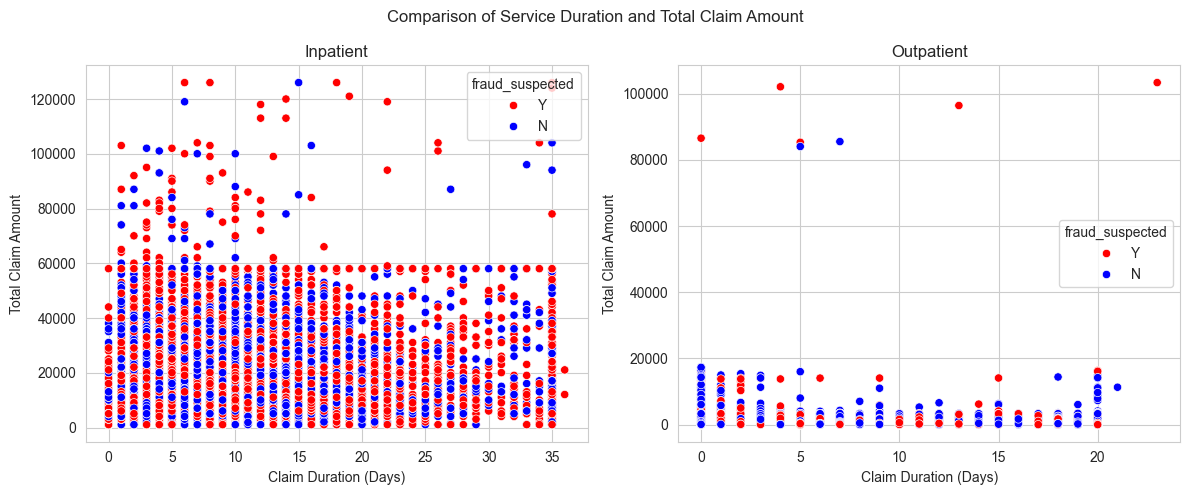

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# set fraud flag colors
colors = {'Y': 'red', 'N': 'blue'}

sns.scatterplot(data=inpatient_durations, x='claim_duration', y='total_claim_amount', ax=axes[0], 
                hue='fraud_suspected', palette=colors)
axes[0].set_title('Inpatient')
axes[0].set_ylabel('Total Claim Amount')
axes[0].set_xlabel('Claim Duration (Days)')

sns.scatterplot(data=outpatient_durations, x='claim_duration', y='total_claim_amount', ax=axes[1], 
                hue='fraud_suspected', palette=colors)
axes[1].set_title('Outpatient')
axes[1].set_ylabel('Total Claim Amount')
axes[1].set_xlabel('Claim Duration (Days)')

plt.suptitle('Comparison of Service Duration and Total Claim Amount')
plt.tight_layout() 
plt.show()

Suspected fraud is everywhere. 

**Inpatient**:
- Claims are typically low duration (0-5 days) and low claim amount (0 - 10K dollars), regardless of fraud status.
- There is a **notable series of relatively low cost, suspicious claims with 35 day durations** that is not seen in the no-fraud set.  

**Outpatient**:
- Claims are typically low cost and either same-day or have an average window of 20 days. There is not much difference between fraud and not-fraud observations.  

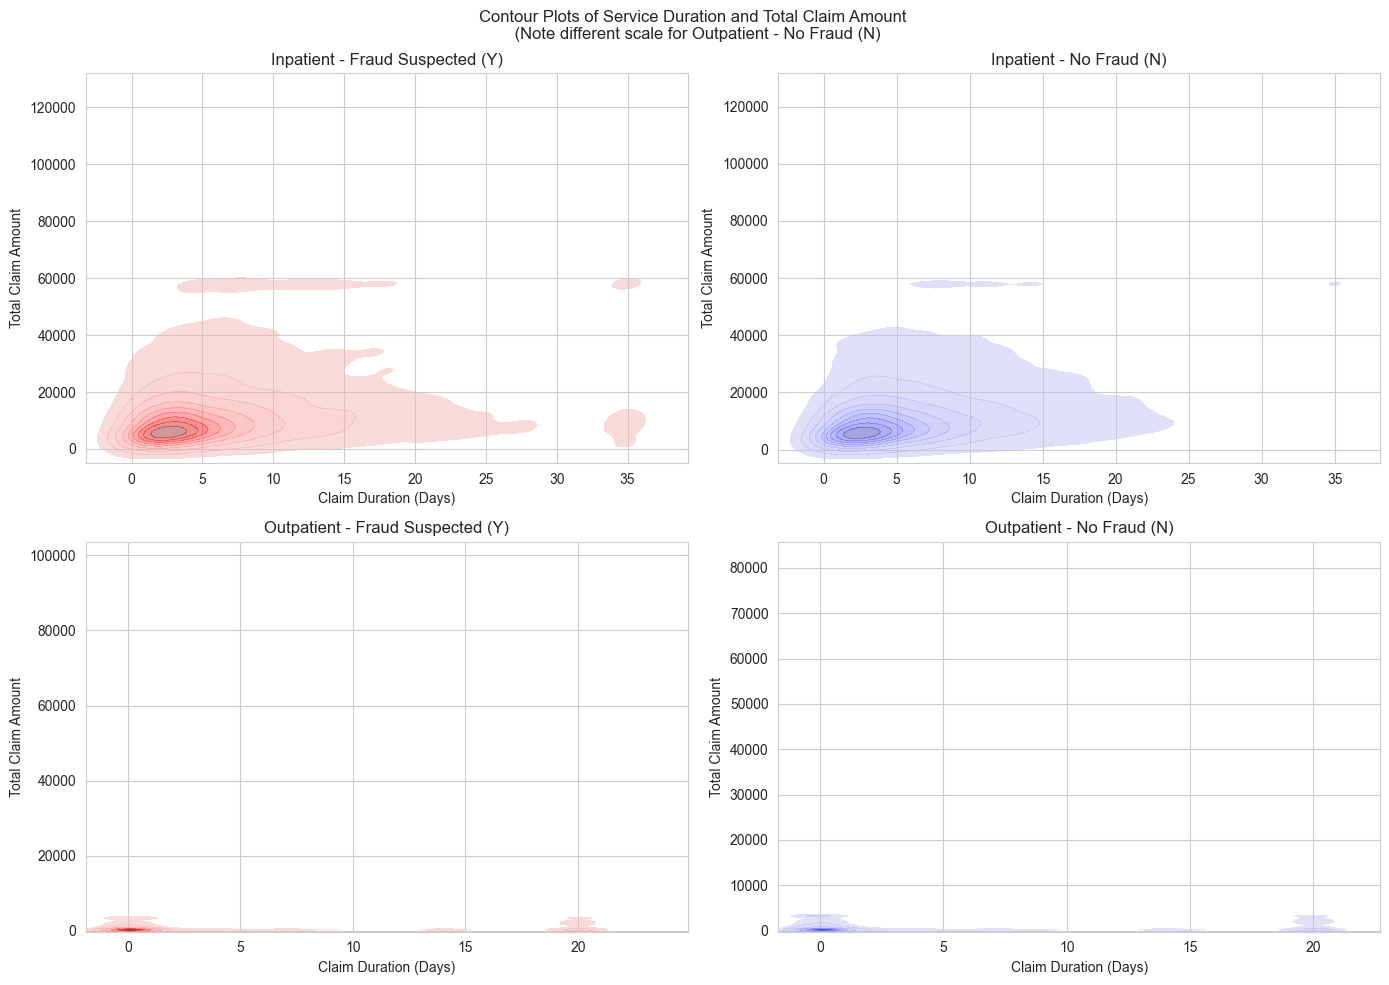

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (data, title) in enumerate([(inpatient_durations, 'Inpatient'), 
                                       (outpatient_durations, 'Outpatient')]):
    # Fraud = Y
    fraud_data = data[data['fraud_suspected'] == 'Y']
    sns.kdeplot(data=fraud_data, x='claim_duration', y='total_claim_amount', 
                ax=axes[idx, 0], color='red', fill=True, alpha=0.5)
    axes[idx, 0].set_title(f'{title} - Fraud Suspected (Y)')
    axes[idx, 0].set_xlabel('Claim Duration (Days)')
    axes[idx, 0].set_ylabel('Total Claim Amount')
    
    # Fraud = N
    no_fraud_data = data[data['fraud_suspected'] == 'N']
    sns.kdeplot(data=no_fraud_data, x='claim_duration', y='total_claim_amount', 
                ax=axes[idx, 1], color='blue', fill=True, alpha=0.5)
    axes[idx, 1].set_title(f'{title} - No Fraud (N)')
    axes[idx, 1].set_xlabel('Claim Duration (Days)')
    axes[idx, 1].set_ylabel('Total Claim Amount')

plt.suptitle('Contour Plots of Service Duration and Total Claim Amount \n (Note different scale for Outpatient - No Fraud (N)')
plt.tight_layout()
plt.show()

# Consider mean daily total charges (i.e. total charge/duration), please describe their distribution.

mean daily total charges = total claim amount / claim duration

How do the **Potential Fraud** flag affect the distribution patterns?

In [85]:
# create a column with mean daily total charges. If claim_duration = 0, use total_claim_amount

inpatient_durations.loc[:, 'mean_daily_total_charges'] = np.where(
    inpatient_durations['claim_duration'] == 0,
    inpatient_durations['total_claim_amount'],
    round(inpatient_durations['total_claim_amount'] / inpatient_durations['claim_duration'], 2)
)

outpatient_durations.loc[:, 'mean_daily_total_charges'] = np.where(
    outpatient_durations['claim_duration'] == 0,
    outpatient_durations['total_claim_amount'],
    round(outpatient_durations['total_claim_amount'] / outpatient_durations['claim_duration'], 2)
)

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_38388/1349986930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inpatient_durations.loc[:, 'mean_daily_total_charges'] = np.where(
/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_38388/1349986930.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outpatient_durations.loc[:, 'mean_daily_total_charges'] = np.where(


In [86]:
inpatient_durations.head(2)

,BeneID,covered_percentage,claim_duration,Provider,ClaimID,fraud_suspected,total_claim_amount,mean_daily_total_charges
0,BENE11001,0.960544,6,PRV55912,CLM46614,Y,27068.0,4511.33
1,BENE11001,0.823995,2,PRV55907,CLM66048,N,6068.0,3034.00


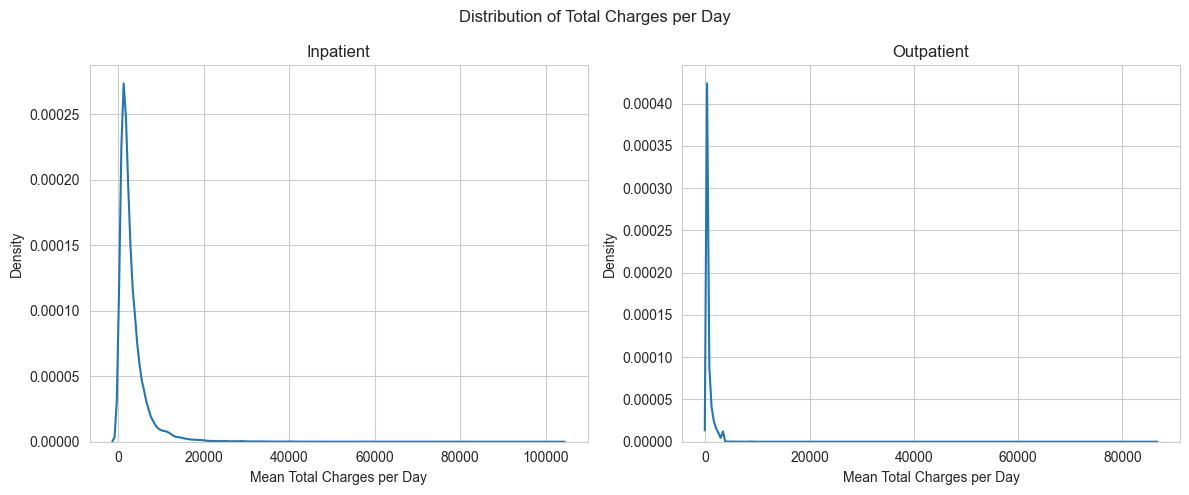

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(data=inpatient_durations, x='mean_daily_total_charges', ax=axes[0])
axes[0].set_title('Inpatient')
axes[0].set_xlabel('Mean Total Charges per Day')
axes[0].set_ylabel('Density')

sns.kdeplot(data=outpatient_durations, x='mean_daily_total_charges', ax=axes[1])
axes[1].set_title('Outpatient')
axes[1].set_xlabel('Mean Total Charges per Day')
axes[1].set_ylabel('Density')

plt.suptitle('Distribution of Total Charges per Day')
plt.tight_layout() 
plt.show()

### How does fraud status affect the distribution patterns?

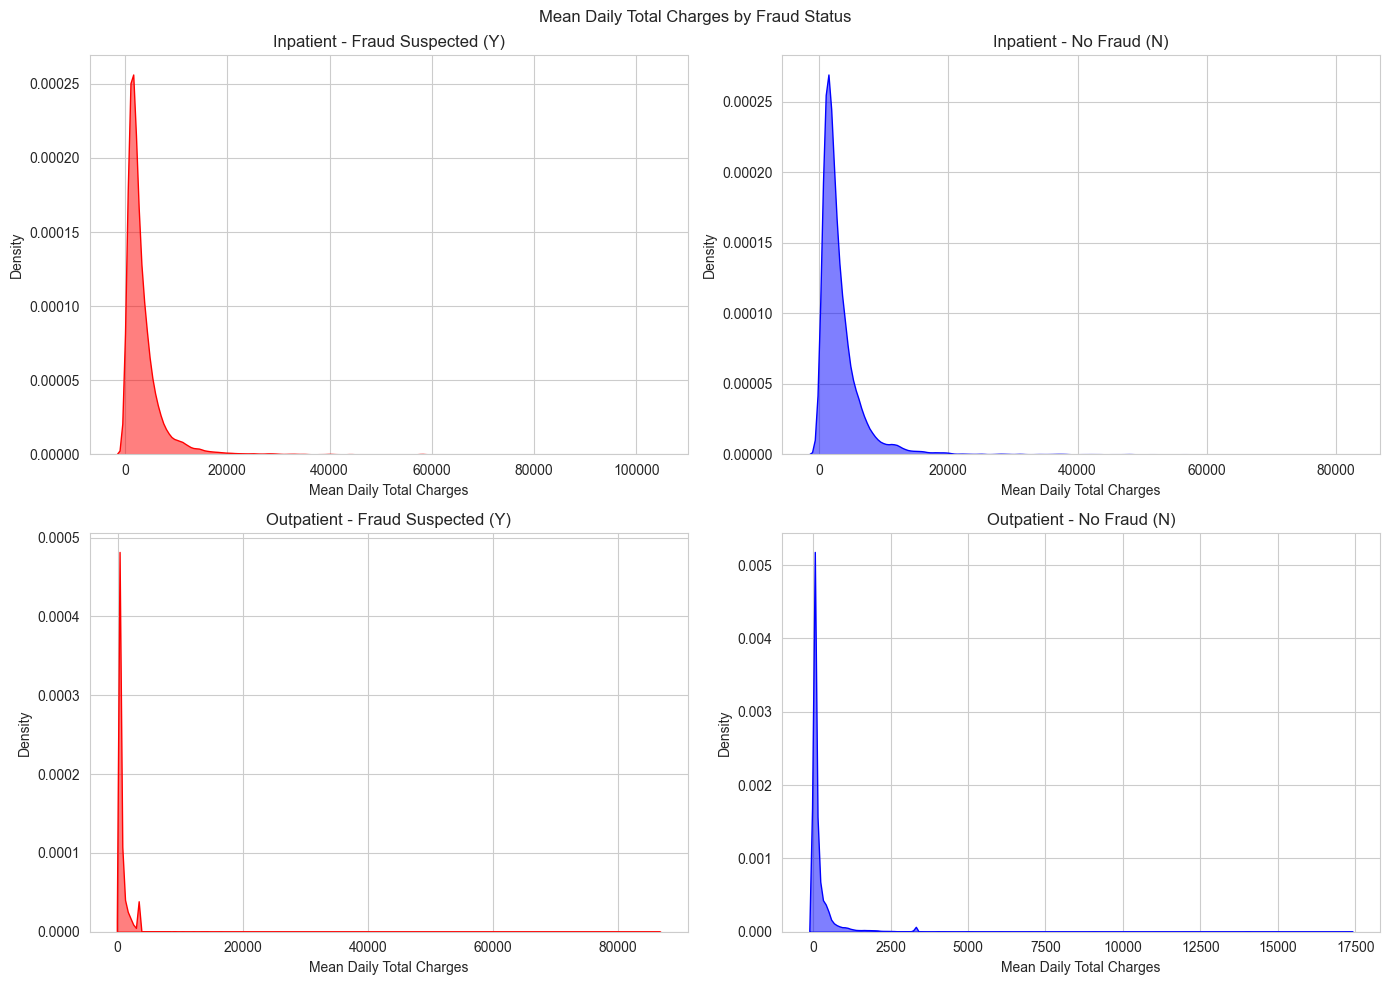

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (data, title) in enumerate([(inpatient_durations, 'Inpatient'), 
                                       (outpatient_durations, 'Outpatient')]):
    # Fraud = Y
    fraud_data = data[data['fraud_suspected'] == 'Y']
    sns.kdeplot(data=fraud_data, x='mean_daily_total_charges', # y='total_claim_amount', 
                ax=axes[idx, 0], color='red', fill=True, alpha=0.5)
    axes[idx, 0].set_title(f'{title} - Fraud Suspected (Y)')
    axes[idx, 0].set_xlabel('Mean Daily Total Charges')
    axes[idx, 0].set_ylabel('Density')
    
    # Fraud = N
    no_fraud_data = data[data['fraud_suspected'] == 'N']
    sns.kdeplot(data=no_fraud_data, x='mean_daily_total_charges', # y='total_claim_amount', 
                ax=axes[idx, 1], color='blue', fill=True, alpha=0.5)
    axes[idx, 1].set_title(f'{title} - No Fraud (N)')
    axes[idx, 1].set_xlabel('Mean Daily Total Charges')
    axes[idx, 1].set_ylabel('Density')

plt.suptitle('Mean Daily Total Charges by Fraud Status')
plt.tight_layout()
plt.show()

### what is the value of the mean daily charge at this spike in outpatient suspected fraud? 

In [91]:
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde

# Create KDE
kde = gaussian_kde(data['mean_daily_total_charges'].dropna())
x_range = np.linspace(data['mean_daily_total_charges'].min(), 
                      data['mean_daily_total_charges'].max(), 1000)
density = kde(x_range)

# Find peaks
peaks, _ = find_peaks(density, prominence=0.00001)
mode_locations = x_range[peaks]

print(f"Approximate mode locations: {mode_locations}")

Approximate mode locations: [  86.66366366 3293.21921922]


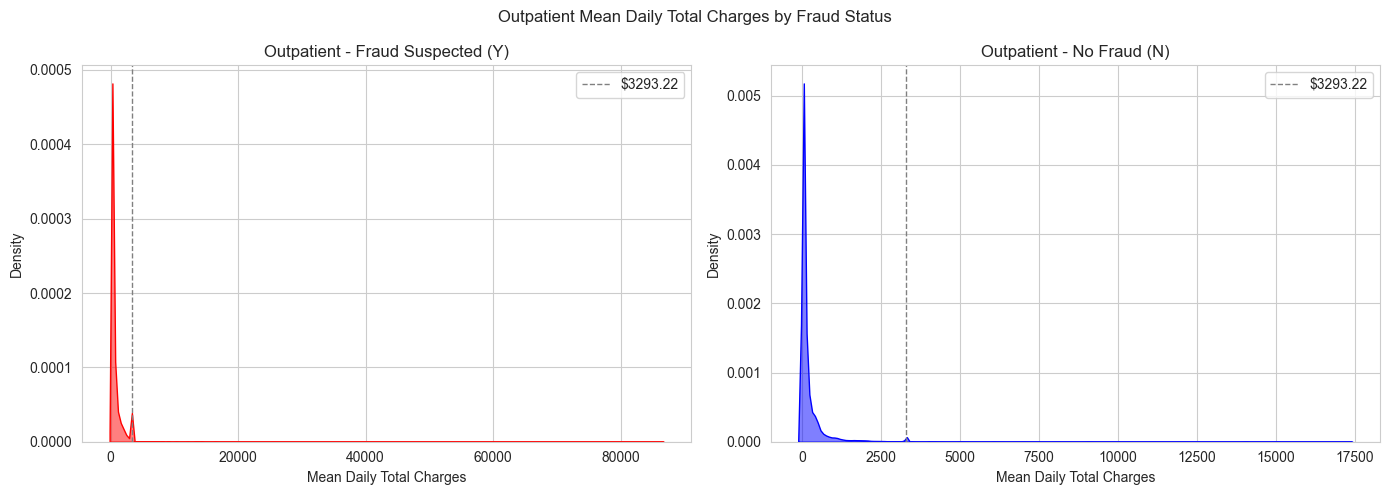

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fraud = Y
fraud_data = outpatient_durations[outpatient_durations['fraud_suspected'] == 'Y']
sns.kdeplot(data=fraud_data, x='mean_daily_total_charges', 
            ax=axes[0], color='red', fill=True, alpha=0.5)
axes[0].axvline(x=3293.22, color='grey', linestyle='--', linewidth=1, label='$3293.22')
axes[0].set_title('Outpatient - Fraud Suspected (Y)')
axes[0].set_xlabel('Mean Daily Total Charges')
axes[0].set_ylabel('Density')
axes[0].legend()

# Fraud = N
no_fraud_data = outpatient_durations[outpatient_durations['fraud_suspected'] == 'N']
sns.kdeplot(data=no_fraud_data, x='mean_daily_total_charges', 
            ax=axes[1], color='blue', fill=True, alpha=0.5)
axes[1].axvline(x=3293.22, color='grey', linestyle='--', linewidth=1, label='$3293.22')
axes[1].set_title('Outpatient - No Fraud (N)')
axes[1].set_xlabel('Mean Daily Total Charges')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.suptitle('Outpatient Mean Daily Total Charges by Fraud Status')
plt.tight_layout()
plt.show()

Adding fraud status highlights a spike in outpatient daily total charges around $3293.22 in both suspected and not-suspected cases. It appears there is a higher volume for the suspected fraud cases, but should be looked at more closely. 

# EXTRA

- pivot tables

In [202]:
# add patient type to dataframes in order to make one patient dataframe
inpatient_fraud.loc[:, 'patient_claim_type'] = 'Inpatient'
outpatient_fraud.loc[:, 'patient_claim_type'] = 'Outpatient'

inpatient_no_fraud.loc[:, 'patient_claim_type'] = 'Inpatient'
outpatient_no_fraud.loc[:, 'patient_claim_type'] = 'Outpatient'

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_38388/3905848451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inpatient_fraud.loc[:, 'patient_claim_type'] = 'Inpatient'
/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_38388/3905848451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outpatient_fraud.loc[:, 'patient_claim_type'] = 'Outpatient'
/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_38388/3905848451.py:5: SettingWithCopyWarning: 
A value is trying to be set o

In [204]:
inpatient_no_fraud.head(2)

,BeneID,covered_percentage,claim_duration,Provider,ClaimID,fraud_suspected,patient_claim_type
1,BENE11001,0.823995,2,PRV55907,CLM66048,N,Inpatient
2,BENE11001,0.823995,3,PRV56046,CLM68358,N,Inpatient


In [206]:
# look at IP and OP in one place
patient_durations_fraud = pd.concat([inpatient_fraud, outpatient_fraud], ignore_index=True)
patient_durations_no_fraud = pd.concat([inpatient_no_fraud, outpatient_no_fraud], ignore_index=True)
patient_durations_no_fraud

,BeneID,covered_percentage,claim_duration,Provider,ClaimID,fraud_suspected,patient_claim_type
0,BENE11001,0.823995,2,PRV55907,CLM66048,N,Inpatient
1,BENE11001,0.823995,3,PRV56046,CLM68358,N,Inpatient
2,BENE11011,0.823995,8,PRV52405,CLM38412,N,Inpatient
3,BENE11014,0.903506,17,PRV56614,CLM63689,N,Inpatient
4,BENE11018,0.882223,5,PRV54090,CLM32075,N,Inpatient
...,...,...,...,...,...,...,...
345410,BENE159198,1.000000,0,PRV53699,CLM510792,N,Outpatient
345411,BENE159198,1.000000,0,PRV53702,CLM551294,N,Outpatient
345412,BENE159198,1.000000,0,PRV53676,CLM596444,N,Outpatient
345413,BENE159198,1.000000,0,PRV53689,CLM636992,N,Outpatient


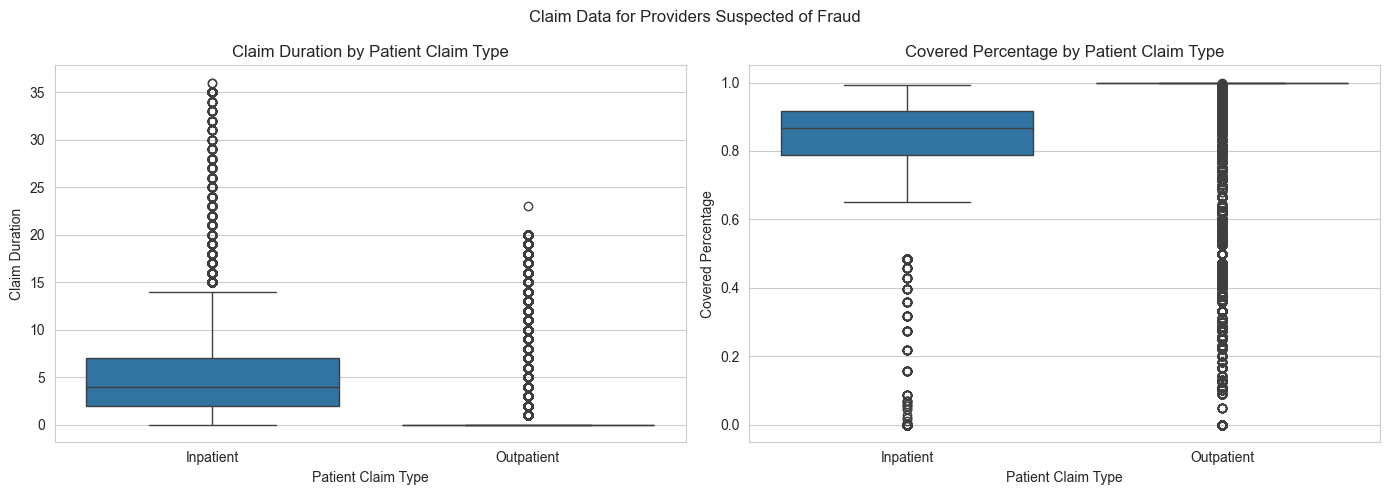

In [208]:
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# claim_duration by patient_claim_type
sns.boxplot(data=patient_durations_fraud, x='patient_claim_type', y='claim_duration', ax=axes[0])
axes[0].set_title('Claim Duration by Patient Claim Type')
axes[0].set_xlabel('Patient Claim Type')
axes[0].set_ylabel('Claim Duration')

# covered_percentage by patient_claim_type
sns.boxplot(data=patient_durations_fraud, x='patient_claim_type', y='covered_percentage', ax=axes[1])
axes[1].set_title('Covered Percentage by Patient Claim Type')
axes[1].set_xlabel('Patient Claim Type')
axes[1].set_ylabel('Covered Percentage')

plt.suptitle('Claim Data for Providers Suspected of Fraud')
plt.tight_layout()
plt.show()

In [210]:
# create pivot tables with Provider and claim_duration data
inpatient_durations_pivot_table = inpatient_durations.groupby(['Provider', inpatient_durations['claim_duration']]).size().unstack(fill_value=0)
outpatient_durations_pivot_table = outpatient_durations.groupby(['Provider', outpatient_durations['claim_duration']]).size().unstack(fill_value=0)

In [212]:
inpatient_durations_pivot_table

claim_duration,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRV51003,0,8,9,10,9,4,6,7,0,2,...,1,0,0,0,0,0,0,0,0,0
PRV51007,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
PRV51008,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRV51011,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57719,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
PRV57728,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRV57729,1,2,0,1,1,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
# add fraud label to providers
inpatient_durations_pivot_table['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in inpatient_durations_pivot_table.index
]
outpatient_durations_pivot_table['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in outpatient_durations_pivot_table.index
]

In [216]:
inpatient_durations_pivot_table

claim_duration,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,fraud_suspected
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
PRV51003,0,8,9,10,9,4,6,7,0,2,...,0,0,0,0,0,0,0,0,0,Y
PRV51007,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,N
PRV51008,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
PRV51011,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57719,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,N
PRV57728,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
PRV57729,1,2,0,1,1,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,N


In [218]:
inpatient_durations.head(2)

,BeneID,covered_percentage,claim_duration,Provider,ClaimID,fraud_suspected,total_claim_amount,mean_daily_total_charges
0,BENE11001,0.960544,6,PRV55912,CLM46614,Y,27068.0,4511.33
1,BENE11001,0.823995,2,PRV55907,CLM66048,N,6068.0,3034.00


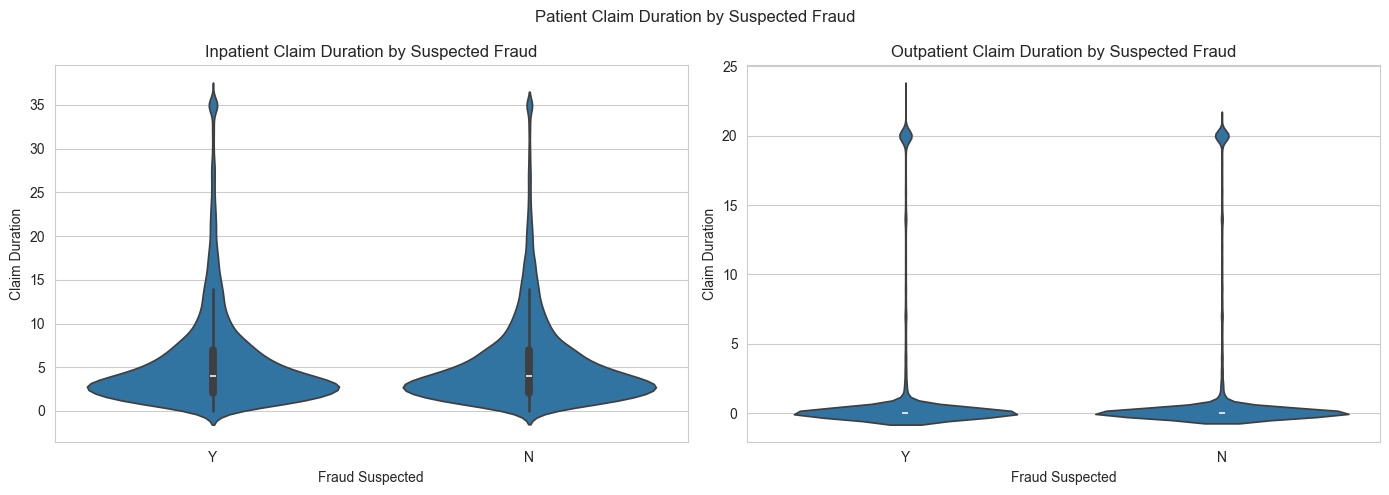

In [220]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# inpatient claim_duration by suspected fraud
sns.violinplot(data=inpatient_durations, x='fraud_suspected', y='claim_duration', ax=axes[0])
axes[0].set_title('Inpatient Claim Duration by Suspected Fraud')
axes[0].set_xlabel('Fraud Suspected')
axes[0].set_ylabel('Claim Duration')

# outpatient claim_duration by suspected fraud
sns.violinplot(data=outpatient_durations, x='fraud_suspected', y='claim_duration', ax=axes[1])
axes[1].set_title('Outpatient Claim Duration by Suspected Fraud')
axes[1].set_xlabel('Fraud Suspected')
axes[1].set_ylabel('Claim Duration')

plt.suptitle('Patient Claim Duration by Suspected Fraud')
plt.tight_layout()
plt.show()

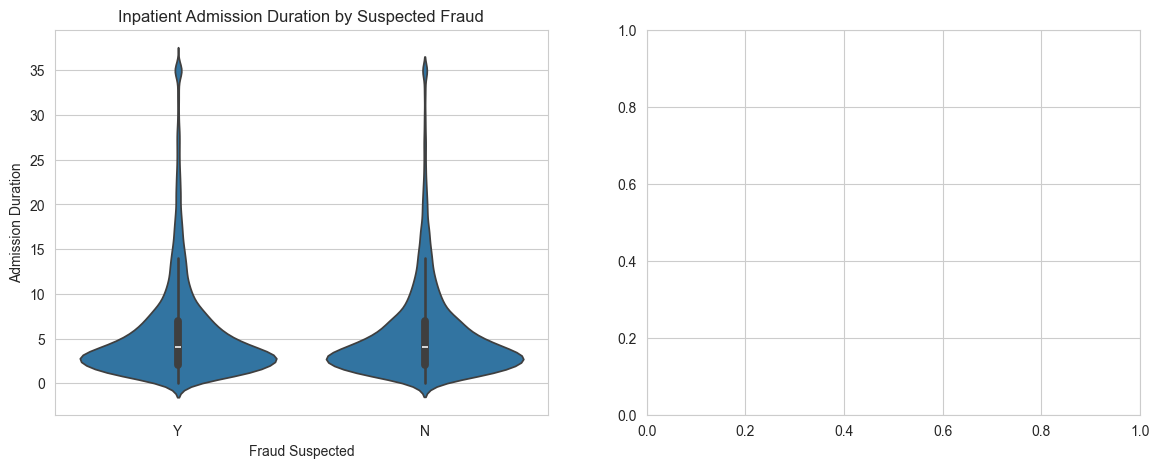

In [224]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# inpatient claim_duration by suspected fraud
sns.violinplot(data=inpatient_durations, x='fraud_suspected', y='claim_duration', ax=axes[0])
axes[0].set_title('Inpatient Admission Duration by Suspected Fraud')
axes[0].set_xlabel('Fraud Suspected')
axes[0].set_ylabel('Admission Duration');